## Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load thư viện

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import joblib

## Load mô hình ML

In [3]:
root_path = './drive/MyDrive/ImageClassification/'
model = joblib.load(root_path + 'RandomForest.pkl')
model

RandomForestClassifier()

## Hàm tiền xử lý và dự đoán nhãn ảnh

In [ ]:
def img_predict(img, rsize):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (rsize, rsize))
    flat_img = list(img.flatten())
    lb = model.predict([flat_img])
    return lb[0]

## Build GUI load ảnh và dự báo loại bóng

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

Saving motorcycle_13.jpg to motorcycle_13.jpg


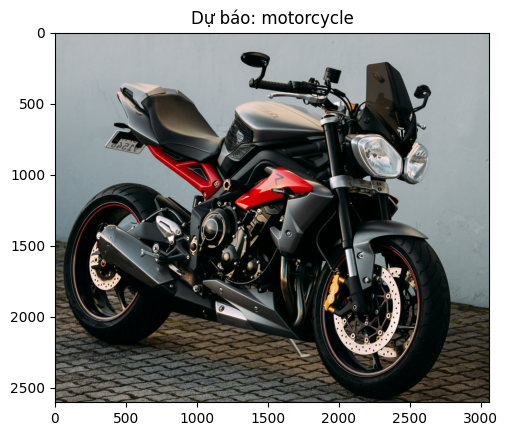

In [ ]:
uploaded = files.upload()
im_name = list(uploaded.keys())
im = np.array(Image.open(BytesIO(uploaded[im_name[0]])))
lb_pre = img_predict(im, 256)

plt.imshow(im)
plt.title('Dự báo: '+lb_pre)
plt.show()